In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pdb
import astropy
from astropy.table import Table
import linecache
from astropy.io import ascii
from astropy.time import Time
from astropy.stats import sigma_clip
import pandas as pd
from statistics import mean
from scipy.optimize import curve_fit

In [2]:
file='2020lao.csv'
lc = pd.read_csv('/home/lara/ICE/Photometry/'+file, comment='#')
print(lc)

mjd=lc.mjd
flux=lc.f
eflux=lc.ef
band=lc.band
det=lc.det
mag=lc.m
emag=lc.em
det=lc.det

#pdb.set_trace()

if file[4:7]=='itj': k=0
elif file[4:7]=='jfo': k=1
elif file[4:7]=='jgl': k=2
elif file[4:7]=='jhf': k=3
elif file[4:7]=='kjt': k=4
elif file[4:7]=='kku': k=5
elif file[4:7]=='kyx': k=6
elif file[4:7]=='lao': k=7
elif file[4:7]=='nny': k=8
else: k=9

               mjd          m  em          f         ef  band    det       zp  \
0     58901.610000  20.120292 NaN  21.500000   6.500000     o  False  23.9000   
1     58903.660000  19.752588 NaN -20.250000   9.120000     c  False  23.9000   
2     58905.650000  20.589294 NaN -19.170000   4.220000     o  False  23.9000   
3     58911.610000  19.333194 NaN  13.200000  13.420000     c  False  23.9000   
4     58913.640000  20.581603 NaN  13.750000   4.250000     o  False  23.9000   
...            ...        ...  ..        ...        ...   ...    ...      ...   
2071  59636.508032  20.436328 NaN   2.484201   4.858463  ztfg  False  26.3039   
2072  59639.432477  20.051553 NaN  20.250128   6.924827  ztfg  False  26.2264   
2073  59639.512882  19.701697 NaN   1.723953   9.557653  ztfr  False  26.2237   
2074  59641.456331  20.367460 NaN  -3.712148   5.176615  ztfr  False  26.1967   
2075  59641.517917  20.932527 NaN   1.373453   3.076231  ztfg  False  26.3144   

        f_counts  ef_counts

In [3]:
def get_plot_parameters():
    alp,size=0.6,120
    classes,colors=['o','c','ztfg','ztfr','ztfi'],['orange','aquamarine','g','r','saddlebrown']
    markers=['o','v']
    labels=['o-band ATLAS','c-band ATLAS','g-band ZTF','r-band ZTF','i-band ZTF']
    anti_labels=['o-band nd ATLAS','c-band nd ATLAS','g-band nd ZTF','r-band nd ZTF','i-band nd ZTF']
    return alp,size,classes,colors,labels,anti_labels

def fireball(t,t0,a,n):
    return a*(t-t0)**n

# Plot LC in flux units

Epochs: forced lnd, reported ln, discovery and spectrum

In [4]:
forcedlnd0=[58960.50566,np.nan,58974.295178,58974.25244,58915.52807869995,58983.49,58991.32,58992.332,59009.7,np.nan]
lnd0=[58970.29406250,58971.27512731,58975.30299769,58975.41299769,58986.47086806,58987.33887731,58992.27231481,58994.31446759,59025.33978009,59076.34034722]
disc0=[58970.35940970,58975.20256000,58976.28800000,58977.42600000,58987.35179400,58987.40451390,58993.26880791,58994.41313660,59026.47439810,59077.30130791]
obs0=[58970.98846375,58975.90494008,58976.89521855,58978.91818904,58988.14241477,58988.17400390,58994.18696777,58995.19488894,59027.19168021,59078.21509605]

Plot:

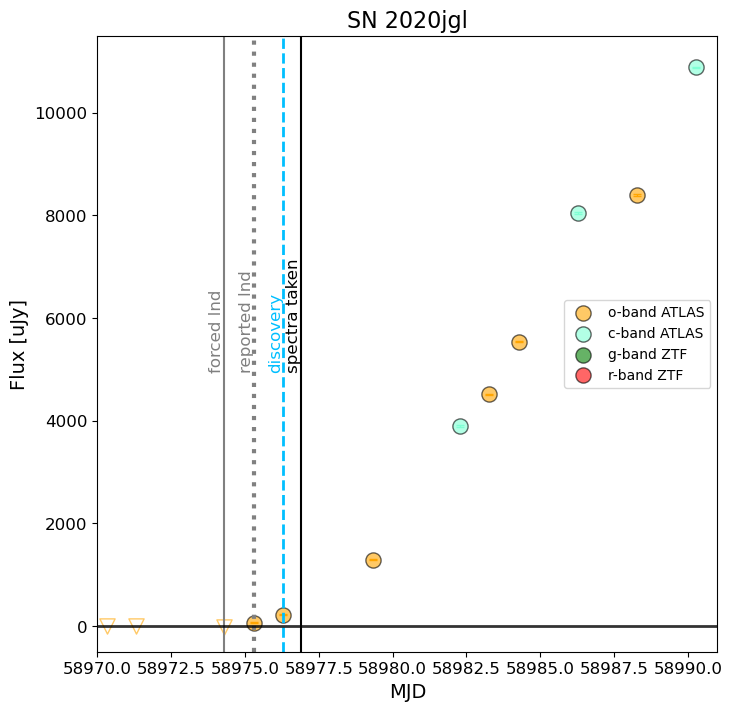

In [406]:
fig,ax = plt.subplots(1, 1, figsize=(8,8))

mask=(det==True) #detections
alp,size,classes,colors,labels,anti_labels=get_plot_parameters()

for ii in range(4):
    #non-detections
    #ax.errorbar(mjd[band==classes[ii]][~mask],flux[band==classes[ii]][~mask],yerr=eflux[band==classes[ii]][~mask], ls='None',color=colors[ii],linewidth=1,capsize = 3,zorder=1)
    ax.scatter(mjd[band==classes[ii]][~mask],flux[band==classes[ii]][~mask],alpha=alp,s=size,marker='v',color='white',ec=colors[ii])
    
    #detections
    ax.errorbar(mjd[band==classes[ii]][mask],flux[band==classes[ii]][mask],yerr=eflux[band==classes[ii]][mask], ls='None',color=colors[ii],linewidth=1,capsize = 3,zorder=1)
    ax.scatter(mjd[band==classes[ii]][mask],flux[band==classes[ii]][mask],alpha=alp,s=size,marker='o',color=colors[ii],ec='k',label=labels[ii])

#Time Lines
forcedlnd=forcedlnd0[k]
lnd=lnd0[k]
disc=disc0[k]
obs=obs0[k]
plt.axvline(x = forcedlnd, color = 'gray')
plt.axvline(x = lnd, color = 'gray',linestyle=':',lw=3)
plt.axvline(x = disc, color = 'deepskyblue',linestyle='--',lw=2)
plt.axvline(x = obs, color = 'k')

offset=-0.5
y=5000
ax.text(forcedlnd+offset,y,'forced lnd',rotation='vertical',size=12,color='gray')
ax.text(lnd+offset,y,'reported lnd',rotation='vertical',size=12,color='gray')
ax.text(disc+offset,y,'discovery',rotation='vertical',size=12,color='deepskyblue')
ax.text(obs+offset,y,'spectra taken',rotation='vertical',size=12)
   
plt.title('SN '+file[:7],fontsize=16)
plt.xlabel('MJD',fontsize=14)
plt.ylabel('Flux [uJy]',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-500,11500)
plt.xlim(58970,58991)
plt.axhline(y=0,color='k',lw=2,alpha=0.8)

#get handles and labels
#handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [0,1,5,7,2,3,4,6]
plt.legend(fontsize=10)
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12)#,bbox_to_anchor=(1.1, 0.4))#loc='upper right') 


##LC in flux density units
plt.savefig('/home/lara/ICE/Photometry/plots/'+'lc_'+file[:7]+'_fluxunits.pdf', format='pdf', dpi=300, bbox_inches = "tight")
plt.savefig('/home/lara/ICE/Photometry/plots/png/'+'lc_'+file[:7]+'_fluxunits.png', format='png', dpi=300, bbox_inches = "tight")

# LC in magnitudes

In [44]:
#ONLY FOR JGL
def get_parameters_jgl():
    alp,size=0.6,120
    classes,colors=['U','B','V','g','r','i'],['brown','dodgerblue','greenyellow','seagreen','tomato','purple']
    labels=['U-band LCOGT','B-band LCOGT','V-band LCOGT','g\'-band LCOGT','r\'-band LCOGT','i\'-band LCOGT']
    return alp,size,classes,colors,labels

file='2020jgl.txt'
lc = Table.read('/home/lara/ICE/Photometry/OTHER/sn'+file, format='ascii')
print(lc)

mjd2=np.array(lc['mjd'])
mag2,emag2=np.array(lc['mag']),np.array(lc['emag'])
band2=np.array(lc['band'])

    mjd         mag      emag   band
------------ --------- -------- ----
  58976.7201   18.5686   0.1101    U
  58977.4488   18.0039   0.1078    U
  58978.8005   16.9448   0.0845    U
  58979.8299   16.3356   0.0931    U
  58980.8014   15.9256   0.0973    U
  58982.7454   15.2239   0.0895    U
   58982.748   15.2329   0.0949    U
         ...       ...      ...  ...
59023.698618 14.883627 0.032154    i
59023.715927 14.864507 0.030474    i
 59024.69863 14.942222 0.035809    i
59025.710066  15.03289 0.035041    i
59027.344293 15.123563 0.030841    i
59028.344458 15.212971 0.032211    i
59029.380504 15.223755 0.029528    i
Length = 279 rows


Distance Modulus: 35.80222209


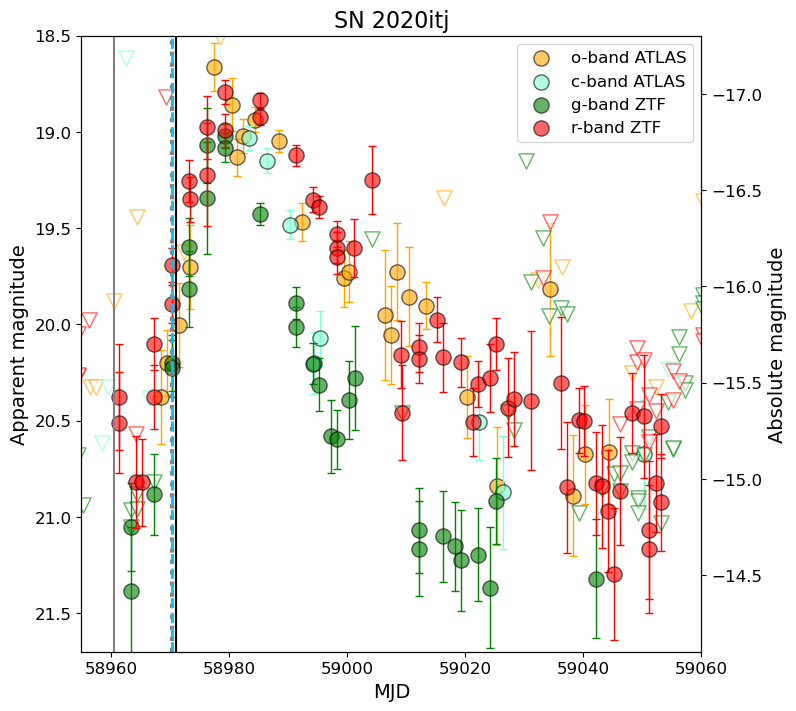

In [197]:
fig,ax = plt.subplots(1, 1, figsize=(8,8))

mask=(det==True) #detections
alp,size,classes,colors,labels,anti_labels=get_plot_parameters()

#distance modulus
dist_mod=[35.80222209,30.81,32.428,34.12732885,36.07224758,37.90103132,35.73112994,35.65305013,35.65515241,36.22089256]

for ii in range(4):
    #non-detections
    ax.scatter(mjd[band==classes[ii]][~mask],mag[band==classes[ii]][~mask],alpha=alp,s=size,marker='v',color='white',ec=colors[ii])
    
    #detections
    ax.errorbar(mjd[band==classes[ii]][mask],mag[band==classes[ii]][mask],yerr=emag[band==classes[ii]][mask], ls='None',color=colors[ii],linewidth=1,capsize = 3,zorder=1)
    ax.scatter(mjd[band==classes[ii]][mask],mag[band==classes[ii]][mask],alpha=alp,s=size,marker='o',color=colors[ii],ec='k',label=labels[ii])
    
##FOR 2020JGL - comment the for cycle above
#alp2,size2,classes2,colors2,labels2=get_parameters_jgl()
#
#for ii in range(6):
#    #detections
#    ax.errorbar(mjd2[band2==classes2[ii]],mag2[band2==classes2[ii]],yerr=emag2[band2==classes2[ii]], ls='None',color=colors2[ii],linewidth=1,capsize = 3,zorder=1)
#    ax.scatter(mjd2[band2==classes2[ii]],mag2[band2==classes2[ii]],alpha=alp2,s=size2,marker='o',color=colors2[ii],ec='k',label=labels2[ii])
    
    
plt.title('SN '+file[:7],fontsize=16)
plt.xlabel('MJD',fontsize=14)
plt.ylabel('Apparent magnitude',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(18.5,21.7)
plt.gca().invert_yaxis()
plt.xlim(58955,59060)

#Time Lines
forcedlnd=forcedlnd0[k]
lnd=lnd0[k]
disc=disc0[k]
obs=obs0[k]
plt.axvline(x = forcedlnd, color = 'gray')
plt.axvline(x = lnd, color = 'gray',linestyle=':',lw=3)
plt.axvline(x = obs, color = 'k')
plt.axvline(x = disc, color = 'deepskyblue',linestyle='--',lw=2)


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,1,5,7,2,3,4,6]
plt.legend(fontsize=12)

#Secondary axis (absolute magnitude)
ax2=ax.twinx()
ax2.set_ylabel('Absolute magnitude',fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
M=lambda m: m-dist_mod[k]
#M=lambda m: m-5*np.log10(14.51*10**6)+5 #SN 2020jfo
ymin,ymax=ax.get_ylim()
ax2.set_ylim(M(18.5),M(21.7))
ax2.plot([],[])
plt.gca().invert_yaxis()
print('Distance Modulus: '+str(dist_mod[k]))

#LC in magnitudes
plt.savefig('/home/lara/ICE/Photometry/plots/'+'lc_'+file[:7]+'_mag.pdf', format='pdf', dpi=300, bbox_inches = "tight")
plt.savefig('/home/lara/ICE/Photometry/plots/png/'+'lc_'+file[:7]+'_mag.png', format='png', dpi=300, bbox_inches = "tight")

# Fireball Fitting

2
x: [58991.3196412 58991.3206481 58992.331088  58992.3320255 58994.4131366
 58994.4140741 58995.3220139 58995.3229398 58996.3300579 58996.3309954
 58997.3845255 58997.385463 ]
y: [  6.19930217   3.38161831   5.84576572   1.65302672  45.38421977
  44.91678834  82.72097994  80.31565078 148.43276495 151.66491173
 227.28694918 219.36660937]
ey: [3.48091035 3.31084479 3.14505318 4.44711344 3.41519091 3.16857021
 3.41730171 3.24655123 3.8276474  4.00349373 4.55012972 4.67478853]
58991.317486674976
3
x: [58992.297338  58992.3082639 58994.3144676 58995.2760417 58995.2869792
 58996.3069907 58996.3079282 58997.3014815 58997.302419  58998.3111111
 58998.3121181]
y: [6.40321784e-03 6.96893033e+00 3.77463855e+01 9.20375797e+01
 9.58202620e+01 1.53524709e+02 1.52964426e+02 2.31419306e+02
 2.33255882e+02 2.99033709e+02 2.91269458e+02]
ey: [3.85249824 4.21164431 3.93478071 4.46546042 4.52830722 5.08846703
 4.98188398 5.14439928 5.2897945  5.80688504 5.92093772]
58992.296424580665


/tmp/ipykernel_7597/284054012.py:10: RuntimeWarning: invalid value encountered in power
  return a*(t-t0)**n


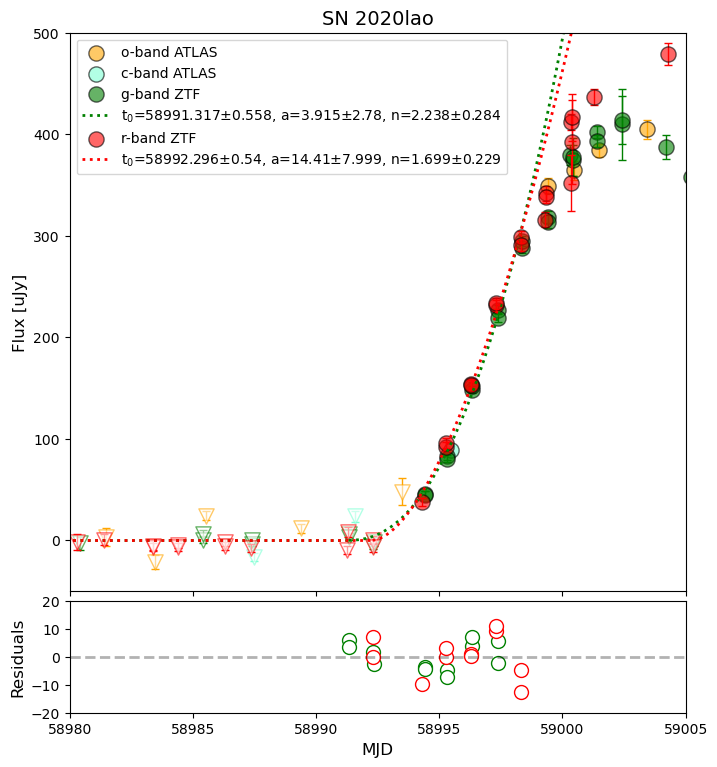

In [26]:
fig=plt.figure(figsize=(7,8))
gs = fig.add_gridspec(2, 1, height_ratios=(10, 2),left=0.1, right=0.98, bottom=0.1, top=0.95, wspace=0.15, hspace=0.03)
ax,ax1=fig.add_subplot(gs[0]),fig.add_subplot(gs[1])

mask=(det==True) #detections
alp,size,classes,colors,labels,anti_labels=get_plot_parameters()

xlin=np.linspace(58960,59010,5000)
ax1.axhline(y=0,color='k',lw=2,alpha=0.3,ls='--')

for ii in range(4):
    #non-detections
    ax.errorbar(mjd[band==classes[ii]][~mask],flux[band==classes[ii]][~mask],yerr=eflux[band==classes[ii]][~mask], ls='None',color=colors[ii],linewidth=1,capsize = 3,zorder=1)
    ax.scatter(mjd[band==classes[ii]][~mask],flux[band==classes[ii]][~mask],alpha=alp,s=size,marker='v',color='white',ec=colors[ii])
    
    #detections
    ax.errorbar(mjd[band==classes[ii]][mask],flux[band==classes[ii]][mask],yerr=eflux[band==classes[ii]][mask], ls='None',color=colors[ii],linewidth=1,capsize = 3,zorder=1)
    ax.scatter(mjd[band==classes[ii]][mask],flux[band==classes[ii]][mask],alpha=alp,s=size,marker='o',color=colors[ii],ec='k',label=labels[ii])
    
    
    #Fitting fireball model
    #down=58973
    #up=58985
    #mask2=((mjd[band==classes[ii]]>=down)&(mjd[band==classes[ii]]<=up)) #all the same MJD range for fitting
    
    ###Different MJD ranges for the fitting
    #if ii==0: mask2=((mjd[band==classes[ii]]>=58973)&(mjd[band==classes[ii]]<=58985)) #o-band ATLAS
    #elif ii==1: mask2=((mjd[band==classes[ii]]>=58970)&(mjd[band==classes[ii]]<=58990)) #c-band ATLAS
    if ii==2: mask2=((mjd[band==classes[ii]]>=58990)&(mjd[band==classes[ii]]<=58998)) #g-band ZTF
    else: mask2=((mjd[band==classes[ii]]>=58992)&(mjd[band==classes[ii]]<=58999)) #r-band ZTF
    
    #ax.axvline(x=58990,color='g',lw=0.8)
    #ax.axvline(x=58998,color='g',lw=0.8)
    ##ax.axvline(x=58961,color='cyan',lw=0.8)
    ##ax.axvline(x=59085,color='cyan',lw=0.8)
    #ax.axvline(x=58992,color='r',lw=0.8)
    #ax.axvline(x=58999,color='r',lw=0.8)
    ##plt.axvline(x=58998,color='g',lw=1.7)
    #plt.axvline(x=59085,color='r',lw=0.9)
    
    if (ii==0)|(ii==1):
        pass
    else:
        #Fitting considering last non-detections
        print(ii)
        #pdb.set_trace()
        x0=np.array(mjd[band==classes[ii]][mask2])
        y0=np.array(np.abs(flux[band==classes[ii]][mask2]))
        ey0=np.array(eflux[band==classes[ii]][mask2])
        
        ##flux error for non-detections = 0.1*flux
        #flag=np.array(det[band==classes[ii]][mask2])
        #is_ndet=(flag==False)
        #ey0[is_ndet]=y0[is_ndet]*0.1
        
        #pdb.set_trace()
        k=np.where(np.isnan(y0)==False) #Remove NaNs
        #pdb.set_trace()
        x=x0[k]
        y=y0[k]
        ey=ey0[k]
        print('x: '+str(x)+'\ny: '+str(y)+'\ney: '+str(ey))#+'\nflag: '+str(flag))
        
        #pdb.set_trace()
        
        popt,pcov = curve_fit(fireball,x,y,sigma=ey,absolute_sigma=True,p0=[58990.,0,2.])
        t0,a,n=popt
        
        #print(np.linalg.cond(pcov))
        et0,ea,en=np.sqrt(np.diag(pcov))
        ax.plot(xlin,fireball(xlin, *popt), color=colors[ii],linestyle=':',lw=2,label='t$_{0}$='+str(np.round(t0,3))+'$\pm$'+str(np.round(et0,3))+', a='+str(np.round(a,3))+'$\pm$'+str(np.round(ea,3))+', n='+str(np.round(n,3))+'$\pm$'+str(np.round(en,3)))
        #pdb.set_trace()
        
        #y_pred=flux[band==classes[ii]]-fireball(mjd[band==classes[ii]], *popt)
        y_pred=y0-fireball(x0, *popt)
        ax1.scatter(x0,y_pred,color='white',ec=colors[ii],s=100)
        print(t0)
        ax.hlines(y = 0,xmin=58960, xmax = t0 , linestyle=':',color= colors[ii],lw=2)
        
ax.set_title('SN '+file[:7],fontsize=14)
ax1.set_xlabel('MJD',fontsize=12)
ax.set_ylabel('Flux [uJy]',fontsize=12)
ax1.set_ylabel('Residuals',fontsize=12)
#ax.set_xticks(fontsize=12)
#ax.set_yticks(fontsize=12)
ax.set_ylim(-50,500)
ax.set_xlim(58980,59005)
ax1.set_xlim(58980,59005)
ax1.set_ylim(-20,20)
ax.xaxis.set_ticklabels([])
#ax.axhline(y=0,color='k',lw=2,alpha=0.8)


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0,1,5,7,2,3,4,6]
ax.legend(fontsize=10)

##Fireball Fitting
#plt.savefig('/home/lara/ICE/Photometry/fireball_fit/'+file[:7]+'_w_residuals_range.png', format='png', dpi=300, bbox_inches = "tight")
plt.savefig('/home/lara/ICE/Photometry/fireball_fit/'+file[:7]+'_w_residuals.png', format='png', dpi=300, bbox_inches = "tight")
plt.savefig('/home/lara/ICE/Photometry/fireball_fit/'+file[:7]+'_w_residuals_paper.pdf', format='pdf', dpi=300, bbox_inches = "tight")

## 2020jgl

In [169]:
def mag_to_flux(mag,emag):
    #AB system
    flux_ab=10**(0.4*(8.90-mag))
    eflux_ab=np.abs(-0.4*np.log(10)*flux_ab*emag)
    #eflux=np.sqrt((-0.4*np.log(10)*10**(0.4*(8.90-mag)))**2*emag**2)
    
    #in microJansky
    flux=flux_ab*10**6
    eflux=eflux_ab*10**6
    
    return flux,eflux

def get_parameters_jgl():
    alp,size=0.6,120
    classes,colors=['U','B','V','g','r','i'],['brown','dodgerblue','greenyellow','seagreen','tomato','purple']
    labels=['U-band LCOGT','B-band LCOGT','V-band LCOGT','g\'-band LCOGT','r\'-band LCOGT','i\'-band LCOGT']
    return alp,size,classes,colors,labels

In [170]:
file='2020jgl.txt'
lc = Table.read('/home/lara/ICE/Photometry/OTHER/sn'+file, format='ascii')
print(lc)

mjd2=np.array(lc['mjd'])
mag2,emag2=np.array(lc['mag']),np.array(lc['emag'])
band2=np.array(lc['band'])
flux2,eflux2=mag_to_flux(mag2,emag2)

    mjd         mag      emag   band
------------ --------- -------- ----
  58976.7201   18.5686   0.1101    U
  58977.4488   18.0039   0.1078    U
  58978.8005   16.9448   0.0845    U
  58979.8299   16.3356   0.0931    U
  58980.8014   15.9256   0.0973    U
  58982.7454   15.2239   0.0895    U
   58982.748   15.2329   0.0949    U
         ...       ...      ...  ...
59023.698618 14.883627 0.032154    i
59023.715927 14.864507 0.030474    i
 59024.69863 14.942222 0.035809    i
59025.710066  15.03289 0.035041    i
59027.344293 15.123563 0.030841    i
59028.344458 15.212971 0.032211    i
59029.380504 15.223755 0.029528    i
Length = 279 rows


0
[58974.28 58975.29 58976.3  58979.32 58983.26 58984.28] [  15.     63.    220.75 1290.75 4513.   5536.17] [ 1.5  11.75 12.75  9.25 15.4  12.11]


/tmp/ipykernel_8059/284054012.py:10: RuntimeWarning: invalid value encountered in power
  return a*(t-t0)**n


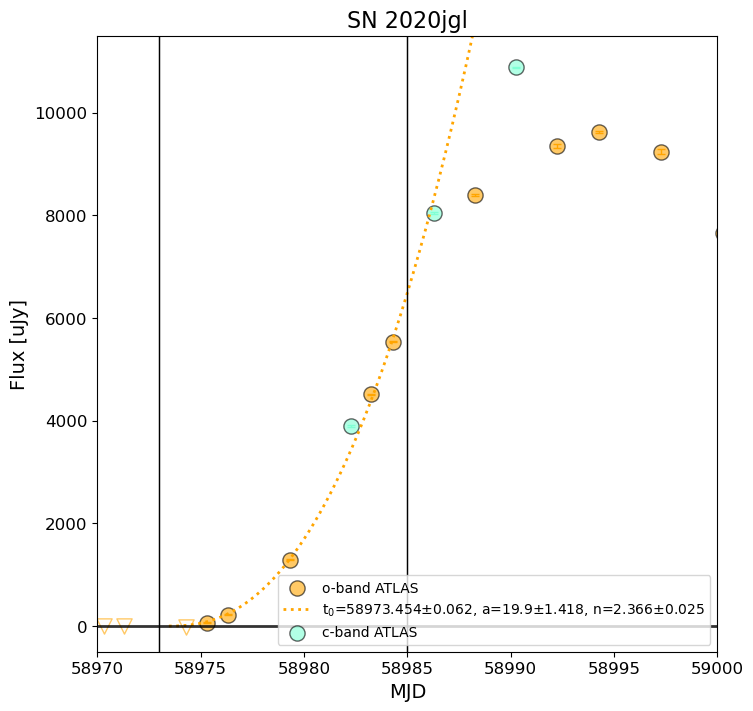

In [232]:
fig,ax = plt.subplots(1, 1, figsize=(8,8))

mask=(det==True) #detections
alp,size,classes,colors,labels,anti_labels=get_plot_parameters()

xlin=np.linspace(58960,59000,5000)

#distance modulus
dist_mod=[35.8269,5*np.log10(14.51*10**6)+5,32.428,34.1389,36.1414,37.9628,35.7574,35.6995,35.6630,36.5197]

for ii in range(2):
    #non-detections
    ax.scatter(mjd[band==classes[ii]][~mask],flux[band==classes[ii]][~mask],alpha=alp,s=size,marker='v',color='white',ec=colors[ii])

    #detections
    ax.errorbar(mjd[band==classes[ii]][mask],flux[band==classes[ii]][mask],yerr=eflux[band==classes[ii]][mask], ls='None',color=colors[ii],linewidth=1,capsize = 3,zorder=1)
    ax.scatter(mjd[band==classes[ii]][mask],flux[band==classes[ii]][mask],alpha=alp,s=size,marker='o',color=colors[ii],ec='k',label=labels[ii])
    
    ##Fitting fireball model
    down=58973
    up=58985
    mask2=((mjd[band==classes[ii]]>=down)&(mjd[band==classes[ii]]<=up)) #all the same MJD range for fitting
    
    plt.axvline(x=58973,color='k',lw=0.9)
    plt.axvline(x=58985,color='k',lw=0.9)
    #plt.axvline(x=58998,color='g',lw=1.7)
    #plt.axvline(x=58998,color='r',lw=0.9)
    
    if (ii==1):
        pass
    else:
        #Fitting considering last non-detections
        print(ii)
        #pdb.set_trace()
        x0=np.array(mjd[band==classes[ii]][mask2])
        y0=np.array(np.abs(flux[band==classes[ii]][mask2]))
        ey0=np.array(eflux[band==classes[ii]][mask2])
        
        #flux error for non-detections = 0.1*flux
        flag=np.array(det[band==classes[ii]][mask2])
        is_ndet=(flag==False)
        ey0[is_ndet]=y0[is_ndet]*0.1
        
        #pdb.set_trace()
        k=np.where(np.isnan(y0)==False) #Remove NaNs
        #pdb.set_trace()
        x=x0[k]
        y=y0[k]
        ey=ey0[k]
        print(x,y,ey)
        
        #pdb.set_trace()
        
        popt,pcov = curve_fit(fireball,x,y,sigma=ey,absolute_sigma=True,p0=[58970.,0,2.])
        t0,a,n=popt
        
        #print(np.linalg.cond(pcov))
        et0,ea,en=np.sqrt(np.diag(pcov))
        plt.plot(xlin,fireball(xlin, *popt), color=colors[ii],linestyle=':',lw=2,label='t$_{0}$='+str(np.round(t0,3))+'$\pm$'+str(np.round(et0,3))+', a='+str(np.round(a,3))+'$\pm$'+str(np.round(ea,3))+', n='+str(np.round(n,3))+'$\pm$'+str(np.round(en,3)))


#alp2,size2,classes2,colors2,labels2=get_parameters_jgl()
#for ii in range(6):
#    #detections
#    ax.errorbar(mjd2[band2==classes2[ii]],flux2[band2==classes2[ii]],yerr=eflux2[band2==classes2[ii]], ls='None',color=colors2[ii],linewidth=1,capsize = 3,zorder=1)
#    ax.scatter(mjd2[band2==classes2[ii]],flux2[band2==classes2[ii]],alpha=alp2,s=size2,marker='o',color=colors2[ii],ec='k',label=labels2[ii])
#    
#    ##Fitting fireball model
#    down=58975
#    up=58982
#    mask2=((mjd2[band2==classes2[ii]]>=down)&(mjd2[band2==classes2[ii]]<=up)) #all the same MJD range for fitting
#    
#    ##Different MJD ranges for the fitting
#    #if ii==0: mask2=((mjd[band==classes[ii]]>=58987)&(mjd[band==classes[ii]]<=59000)) #U-band
#    #elif ii==1: mask2=((mjd[band==classes[ii]]>=58988)&(mjd[band==classes[ii]]<=59002)) #B-band
#    #elif ii==2: mask2=((mjd[band==classes[ii]]>=58990)&(mjd[band==classes[ii]]<=58998)) #V-band 
#    #elif ii==3: mask2=((mjd[band==classes[ii]]>=58990)&(mjd[band==classes[ii]]<=58998)) #g'-band 
#    #elif ii==4: mask2=((mjd[band==classes[ii]]>=58990)&(mjd[band==classes[ii]]<=58998)) #r'-band 
#    #else: mask2=((mjd[band==classes[ii]]>=58990)&(mjd[band==classes[ii]]<=58998)) #i'-band ZTF
#    
#    plt.axvline(x=58975,color='k',lw=0.9)
#    plt.axvline(x=58982,color='k',lw=0.9)
#    #plt.axvline(x=58998,color='g',lw=1.7)
#    #plt.axvline(x=58998,color='r',lw=0.9)
#    
#    #if (ii==0)|(ii==1):
#    #    pass
#    #else:
#    #Fitting considering last non-detections
#    print(ii)
#    #pdb.set_trace()
#    x0=np.array(mjd2[band2==classes2[ii]][mask2])
#    y0=np.array(np.abs(flux2[band2==classes2[ii]][mask2]))
#    ey0=np.array(eflux2[band2==classes2[ii]][mask2])
#    
#    #pdb.set_trace()
#    k=np.where(np.isnan(y0)==False) #Remove NaNs
#    #pdb.set_trace()
#    x=x0[k]
#    y=y0[k]
#    ey=ey0[k]
#    print(x,y,ey)
#    
#    #pdb.set_trace()
#    
#    popt,pcov = curve_fit(fireball,x,y,sigma=ey,absolute_sigma=True,p0=[58970.,0,2.])
#    t0,a,n=popt
#    
#    #print(np.linalg.cond(pcov))
#    et0,ea,en=np.sqrt(np.diag(pcov))
#    plt.plot(xlin,fireball(xlin, *popt), color=colors2[ii],linestyle=':',lw=2,label='t$_{0}$='+str(np.round(t0,3))+'$\pm$'+str(np.round(et0,3))+', a='+str(np.round(a,3))+'$\pm$'+str(np.round(ea,3))+', n='+str(np.round(n,3))+'$\pm$'+str(np.round(en,3)))

   
plt.title('SN '+file[:7],fontsize=16)
plt.xlabel('MJD',fontsize=14)
plt.ylabel('Flux [uJy]',fontsize=14)
#plt.ylabel('Apparent magnitude',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-500,11500)
#plt.gca().invert_yaxis()
plt.xlim(58970,59000)
plt.axhline(y=0,color='k',lw=2,alpha=0.8)


#plt.axvline(x = forcedlnd, color = 'gray')
#plt.axvline(x = lnd, color = 'gray',linestyle=':',lw=3)
#plt.axvline(x = obs, color = 'k')
#plt.axvline(x = disc, color = 'deepskyblue',linestyle='--',lw=2)


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#pdb.set_trace()
order = [0,1,2,3,4,5,6,7]
plt.legend(fontsize=10)

##Secondary axis (absolute magnitude)
#ax2=ax.twinx()
#ax2.set_ylabel('Absolute magnitude',fontsize=14)
#ax2.tick_params(axis='both', which='major', labelsize=12)
#M=lambda m: m-dist_mod[k]
##M=lambda m: m-5*np.log10(14.51*10**6)+5 #SN 2020jfo
#ymin,ymax=ax.get_ylim()
#ax2.set_ylim(M(13.3),M(23))
#ax2.plot([],[])
#plt.gca().invert_yaxis()
#print('Distance Modulus: '+str(dist_mod[k]))
#


##LC in flux density units
#plt.savefig('/home/lara/ICE/Photometry/plots/'+'lc_'+file[:7]+'_fluxunits.pdf', format='pdf', dpi=300, bbox_inches = "tight")
#plt.savefig('/home/lara/ICE/Photometry/plots/png/'+'lc_'+file[:7]+'_fluxunits.png', format='png', dpi=300, bbox_inches = "tight")

#Fireball Fitting
#plt.savefig('/home/lara/ICE/Photometry/fireball_fit/'+file[:7]+'.png', format='png', dpi=300, bbox_inches = "tight")
##plt.savefig('/home/lara/ICE/Photometry/fireball_fit/'+file[:7]+'.pdf', format='pdf', dpi=300, bbox_inches = "tight")